In [16]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index={}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word]=len(token_index)+1
max_length=len(token_index)

results=np.zeros((len(samples),max_length,max(token_index.values())+1))

for i,sample in enumerate(samples):
    print(i)
    print(sample)
    for j,word in list(enumerate(sample.split()))[:max_length]:
        print(j)
        print(word)        
        index=token_index.get(word)
        results[i,j,index]=1.

0
The cat sat on the mat.
0
The
1
cat
2
sat
3
on
4
the
5
mat.
1
The dog ate my homework.
0
The
1
dog
2
ate
3
my
4
homework.


In [31]:
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters=string.printable
token_index=dict(zip(characters,range(1,len(characters)+1)))

max_length=50

results=np.zeros((len(samples),
                  max_length,
                  max(token_index.values())+1))
for i,sample in enumerate(samples):
    for j,character in enumerate(sample[:max_length]):
        index=token_index.get(character)
        results[i,j,index]=1
        

In [40]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer=Tokenizer(num_words=1000)

print(tokenizer.fit_on_texts(samples))

sequences=tokenizer.texts_to_sequences(samples)

one_hot_resuluts=tokenizer.texts_to_matrix(samples,mode='binary')

word_index=tokenizer.word_index
print('Found %s unique tokens.' %len(word_index))

None
Found 9 unique tokens.


In [41]:
print(sequences)
print(one_hot_resuluts)
print(word_index)

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


In [46]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionary=1000
max_length=10

resluts=np.zeros((len(samples),max_length,dimensionary))
for i,sample in enumerate(samples):
    for j,word in list(enumerate(sample.split()))[:max_length]:
        index=abs(hash(word)) % dimensionary
        results[i,j,index]=1.

IndexError: index 880 is out of bounds for axis 2 with size 101

In [47]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We will store our words as vectors of size 1000.
# Note that if you have close to 1000 words (or more)
# you will start seeing many hash collisions, which
# will decrease the accuracy of this encoding method.
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # Hash the word into a "random" integer index
        # that is between 0 and 1000
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [1]:
from keras.datasets import imdb
from keras import preprocessing

max_features=10000
max_len=20

(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)

X_train=preprocessing.sequence.pad_sequences(X_train,maxlen=max_len)
X_test=preprocessing.sequence.pad_sequences(X_test,maxlen=max_len)


Using TensorFlow backend.


In [8]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,Flatten
from keras import preprocessing

model=Sequential()

model.add(Embedding(10000,8,input_length=max_len))

model.add(Flatten())

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 14s 715us/step - loss: 0.6664 - acc: 0.6291 - val_loss: 0.6108 - val_acc: 0.7052
Epoch 2/10
20000/20000 [==============================] - 1s 52us/step - loss: 0.5359 - acc: 0.7519 - val_loss: 0.5218 - val_acc: 0.7278
Epoch 3/10
20000/20000 [=====

In [11]:
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [12]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features=10000
max_len=500
batch_size=32

(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)
print('train_sequence',len(X_train))
print('test_sequence',len(X_test))

input_train=sequence.pad_sequences(X_train,maxlen=max_len)
input_test=sequence.pad_sequences(X_test,maxlen=max_len)

train_sequence 25000
test_sequence 25000


In [30]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Embedding,Dense
model=Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history=model.fit(input_train,y_train,epochs=10,batch_size=128,validation_split=0.2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 12s 621us/step - loss: 0.5908 - acc: 0.6828 - val_loss: 0.4929 - val_acc: 0.7966
Epoch 2/10
20000/20000 [==============================] - 12s 606us/step - loss: 0.3582 - acc: 0.8551 - val_loss: 0.3430 - val_acc: 0.8640
Epoch 3/10
20000/20000 [==============================] - 12s 605us/step 

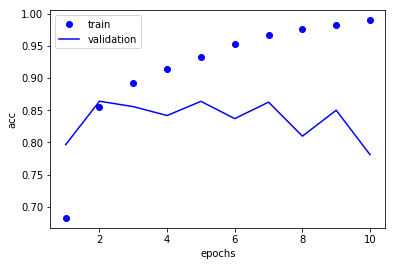

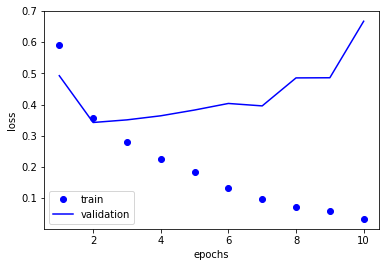

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='train')
plt.plot(epochs,val_acc,'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

plt.plot(epochs,loss,'bo',label='train')
plt.plot(epochs,val_loss,'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [2]:
from keras.layers import LSTM,Embedding,Dense
from keras.models import Sequential
model=Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=['acc'])
history=model.fit(input_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.4978 - acc: 0.7701 - val_loss: 0.3445 - val_acc: 0.8672
Epoch 2/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2960 - acc: 0.8850 - val_loss: 0.2954 - val_acc: 0.8772
Epoch 3/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2345 - acc: 0.9114 - val_loss: 0.3248 - val_acc: 0.8826
Epoch 4/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2012 - acc: 0.9239 - val_loss: 0.2938 - val_acc: 0.8746
Epoch 5/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.1796 - acc: 0.9330 - val_loss: 0.3013 - val_acc: 0.8758
Epoch 6/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.1612 - acc: 0.9424 - val_loss: 0.3043 - val_acc: 0.8684
Epoch 7/1

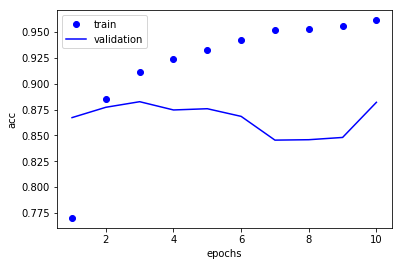

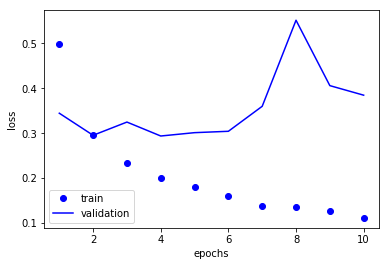

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='train')
plt.plot(epochs,val_acc,'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

plt.plot(epochs,loss,'bo',label='train')
plt.plot(epochs,val_loss,'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [6]:
import os
data_dir='/home/nagae/study/deep-learning-with-python-notebooks/jena_climate'
fname=os.path.join(data_dir,'jena_climate_2009_2016.csv')

f=open(fname)
data=f.read()
f.close()

lines=data.split('\n')
header=lines[0].split(',')
lines=lines[1:]

print(header)
print(len(lines))



['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [7]:
print(lines[1:100])

['01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10', '01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60', '01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00', '01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30', '01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70', '01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50', '01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.40,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.60', '01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.80,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.50', '01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.10,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.00', '01.01.2009 01:50:00,996.62,-8.76,264.66,-9.66,93.10,3

In [8]:
import numpy as np
float_data=np.zeros((len(lines),len(header)-1))
for i,line in enumerate(lines):
    values=[float(x) for x in line.split(',')[1:]]
    float_data[i,:]=values

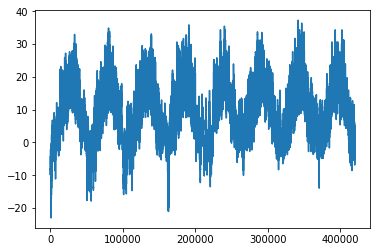

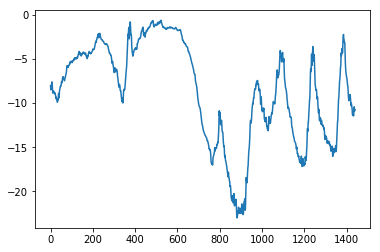

In [9]:
temp=float_data[:,1]
plt.plot(range(len(temp)),temp)
plt.show()

plt.plot(range(1440),temp[:1440])
plt.show()

In [10]:
mean=float_data[:200000].mean(axis=0)
float_data-=mean
std=float_data[:200000].std(axis=0)
float_data/=std

In [11]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [12]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (300000 - 200001 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [13]:
def evaluate_naive_method():
    batch_maes=[]
    for step in range(val_steps):
        samples,targets=next(val_gen)
        preds=samples[:,-1,1]
        mae=np.mean(np.abs(preds-targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    

In [14]:
evaluate_naive_method()

0.2897359729905486


In [34]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model=Sequential()
model.add(layers.Flatten(input_shape=(lookback//step,float_data.shape[-1])))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(),loss='mae')
history=model.fit_generator(train_gen,
                  steps_per_epoch=500,
                  epochs=20,
                  validation_data=val_gen,
                  validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 8s 16ms/step - loss: 1.1010 - val_loss: 0.4980
Epoch 2/20
500/500 [==============================] - 8s 15ms/step - loss: 0.3844 - val_loss: 0.4137
Epoch 3/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2871 - val_loss: 0.3213
Epoch 4/20
500/500 [==============================] - 8s 15ms/step - loss: 0.2611 - val_loss: 0.3710
Epoch 5/20
500/500 [==============================] - 8s 15ms/step - loss: 0.2527 - val_loss: 0.3340
Epoch 6/20
500/500 [==============================] - 8s 15ms/step - loss: 0.2434 - val_loss: 0.3194
Epoch 7/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2375 - val_loss: 0.3088
Epoch 8/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2316 - val_loss: 0.3384
Epoch 9/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2253 - val_loss: 0.3344
Epoch 10/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2215 - val_lo

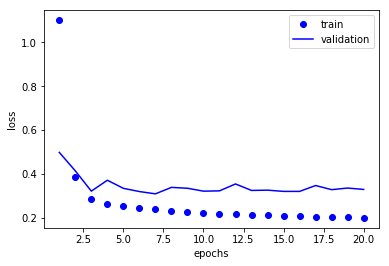

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)


plt.plot(epochs,loss,'bo',label='train')
plt.plot(epochs,val_loss,'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model=Sequential()
model.add(layers.GRU(32,input_shape=(None,float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(),loss='mae')
history=model.fit_generator(train_gen,
                            steps_per_epoch=500,
                            epochs=40,
                            validation_data=val_gen,
                            validation_steps=val_steps)


In [47]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model=Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None,float_data.shape[-1])))

model.add(layers.GRU(64,activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     ))


model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(),loss='mae')
history=model.fit_generator(train_gen,
                            steps_per_epoch=500,
                            epochs=40,
                            validation_data=val_gen,
                            validation_steps=val_steps)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/40
350/500 [====================>.........] - ETA: 47s - loss: 0.3415

KeyboardInterrupt: 

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features=10000

max_len=500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(x_train.shape)

x_train=[x[::-1] for x in x_train]
x_test=[x[::-1] for x in x_test]

x_train=sequence.pad_sequences(x_train,maxlen=max_len)
x_test=sequence.pad_sequences(x_test,maxlen=max_len)

Using TensorFlow backend.


(25000,)


In [53]:
x_train.shape
model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
12800/20000 [==================>...........] - ETA: 20s - loss: 0.5393 - acc: 0.7298

KeyboardInterrupt: 

In [ ]:
model=Sequential()
model.add(layers.Embedding(max_features,32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 8448/20000 [===========>..................] - ETA: 1:15 - loss: 0.6518 - acc: 0.6184

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
max_len = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [4]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model=Sequential()
model.add(layers.Embedding(max_features,128,input_length=max_len))
model.add(layers.Conv1D(32,7,activation="relu",))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32,7,activation="relu",))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


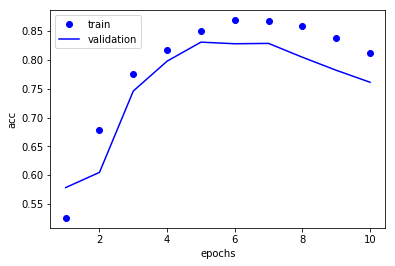

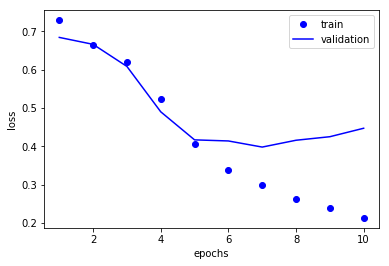

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='train')
plt.plot(epochs,val_acc,'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

plt.plot(epochs,loss,'bo',label='train')
plt.plot(epochs,val_loss,'b',label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [19]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model=Sequential()
model.add(layers.Conv1D(32,5,activation="relu",input_shape=(None,float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32,5,activation="relu",))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32,5,activation="relu",))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='mae',
              metrics=['acc'])

history=model.fit_generator(train_gen,steps_per_epoch=500,epochs=10,validation_data=val_gen,validation_steps=val_steps)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, None, 32)          0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, None, 32)          0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, None, 32)          5152      
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total para

In [20]:
# We reuse the following variables defined in the last section:
# float_data, train_gen, val_gen, val_steps

import os
import numpy as np

data_dir='/home/nagae/study/deep-learning-with-python-notebooks/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values
    
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets
        
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (300000 - 200001 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [23]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model=Sequential()
model.add(layers.Conv1D(32,5,activation="relu",input_shape=(None,float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32,5,activation="relu",))
model.add(layers.GRU(32,dropout=0.1,recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='mae')

history=model.fit_generator(train_gen,steps_per_epoch=500,epochs=10,validation_data=val_gen,validation_steps=val_steps)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, None, 32)          0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, None, 32)          5152      
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
500/500 [===

In [ ]:

()